# Projeto 10: Regressão venda de vídeo games





## Etapa 1: Importação das bibliotecas

In [2]:
import pandas as pd
import torch
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
torch.__version__

'1.13.1+cu116'

## Etapa 2: Base de dados

In [3]:
torch.manual_seed(123)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
base = pd.read_csv('/content/drive/MyDrive/Deep Learing de A à Z com PyTorch/Bases/games.csv')

In [8]:
base.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
base.shape

(16719, 16)

In [10]:
base = base.drop('Other_Sales', axis = 1)
base = base.drop('Global_Sales', axis = 1)
base = base.drop('Developer', axis = 1)

In [11]:
base.shape

(16719, 13)

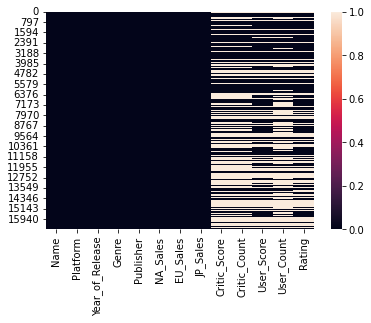

In [12]:
sns.heatmap(base.isnull());

In [13]:
base = base.dropna(axis = 0)

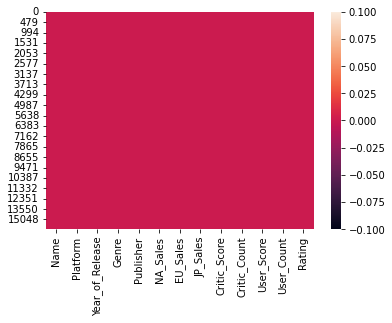

In [14]:
sns.heatmap(base.isnull());

In [15]:
base.shape

(6825, 13)

In [16]:
base.loc[base['NA_Sales'] > 1]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,58.0,41.0,6.6,129.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,NCAA Football 14,X360,2013.0,Sports,Electronic Arts,1.01,0.00,0.00,77.0,18.0,5.8,74.0,E
1877,NFL 2K1,DC,2000.0,Sports,Sega,1.02,0.05,0.00,97.0,22.0,6,47.0,E
1881,Madden NFL 2004,XB,2003.0,Sports,Electronic Arts,1.02,0.02,0.00,92.0,27.0,8.3,48.0,E
1889,NCAA Football 13,X360,2012.0,Action,Electronic Arts,1.02,0.00,0.00,76.0,20.0,5.5,65.0,E


In [17]:
base = base.loc[base['NA_Sales'] > 1]

In [18]:
base.shape

(584, 13)

In [19]:
base.loc[base['EU_Sales'] > 1]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,58.0,41.0,6.6,129.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,Medal of Honor,PS,1998.0,Shooter,Electronic Arts,1.44,1.09,0.00,92.0,17.0,8.6,80.0,T
573,Tom Clancy's Splinter Cell,PS2,2003.0,Action,Ubisoft,1.15,1.11,0.00,89.0,24.0,7.7,102.0,T
591,Mario Strikers Charged,Wii,2007.0,Sports,Nintendo,1.05,1.05,0.24,79.0,47.0,8,124.0,E10+
610,Crazy Taxi,PS2,2001.0,Racing,Acclaim Entertainment,1.13,1.12,0.06,80.0,15.0,7.9,46.0,T


In [20]:
base = base.loc[base['EU_Sales'] > 1]

In [21]:
base.shape

(258, 13)

In [22]:
base['Name'].value_counts

<bound method IndexOpsMixin.value_counts of 0                      Wii Sports
2                  Mario Kart Wii
3               Wii Sports Resort
6           New Super Mario Bros.
7                        Wii Play
                  ...            
568                Medal of Honor
573    Tom Clancy's Splinter Cell
591        Mario Strikers Charged
610                    Crazy Taxi
636         The Sims: Bustin' Out
Name: Name, Length: 258, dtype: object>

In [23]:
base = base.drop('Name', axis = 1)

In [24]:
base.shape

(258, 12)

In [25]:
previsores = base.iloc[:, [0, 1, 2, 3, 7, 8, 9, 10, 11]].values
vendas = base.iloc[:, 4:7].values

In [26]:
previsores

array([['Wii', 2006.0, 'Sports', ..., '8', 322.0, 'E'],
       ['Wii', 2008.0, 'Racing', ..., '8.3', 709.0, 'E'],
       ['Wii', 2009.0, 'Sports', ..., '8', 192.0, 'E'],
       ...,
       ['Wii', 2007.0, 'Sports', ..., '8', 124.0, 'E10+'],
       ['PS2', 2001.0, 'Racing', ..., '7.9', 46.0, 'T'],
       ['PS2', 2003.0, 'Simulation', ..., '8.4', 42.0, 'T']], dtype=object)

In [27]:
vendas

array([[4.136e+01, 2.896e+01, 3.770e+00],
       [1.568e+01, 1.276e+01, 3.790e+00],
       [1.561e+01, 1.093e+01, 3.280e+00],
       [1.128e+01, 9.140e+00, 6.500e+00],
       [1.396e+01, 9.180e+00, 2.930e+00],
       [1.444e+01, 6.940e+00, 4.700e+00],
       [9.710e+00, 7.470e+00, 4.130e+00],
       [8.920e+00, 8.030e+00, 3.600e+00],
       [1.500e+01, 4.890e+00, 2.400e-01],
       [9.010e+00, 8.490e+00, 2.530e+00],
       [7.020e+00, 9.090e+00, 9.800e-01],
       [4.740e+00, 9.200e+00, 4.160e+00],
       [9.660e+00, 5.140e+00, 6.000e-02],
       [8.410e+00, 5.490e+00, 4.700e-01],
       [3.430e+00, 5.350e+00, 5.320e+00],
       [6.850e+00, 5.090e+00, 1.870e+00],
       [9.040e+00, 4.240e+00, 1.300e-01],
       [9.700e+00, 3.680e+00, 1.100e-01],
       [4.990e+00, 5.730e+00, 6.500e-01],
       [8.250e+00, 4.240e+00, 7.000e-02],
       [8.520e+00, 3.590e+00, 8.000e-02],
       [5.540e+00, 5.730e+00, 4.900e-01],
       [6.990e+00, 4.510e+00, 3.000e-01],
       [6.620e+00, 2.550e+00, 2.66

In [28]:
# Wii 1 0
# PS2 0 1
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0, 2, 3, 8])], remainder='passthrough') 
previsores = onehotencorder.fit_transform(previsores).toarray()

In [29]:
previsores.shape

(258, 61)

## Etapa 3: Construção do modelo

In [48]:
# 61 -> 32 -> 32 -> 3
class regressor_torch(nn.Module):
    def __init__(self):
        super().__init__()
        self.dense0 = nn.Linear(61, 32)
        self.dense1 = nn.Linear(32, 32)
        self.activation = nn.Sigmoid()
        self.output = nn.Linear(32, 3)
        
    def forward(self, X):
        X = self.dense0(X)
        X = self.activation(X)
        X = self.dense1(X)
        X = self.activation(X)
        X = self.output(X)
        return X

In [49]:
regressor = regressor_torch()

In [50]:
criterion = nn.MSELoss()
optimizer = optim.Adam(regressor.parameters())

In [51]:
type(previsores)

torch.Tensor

In [52]:
previsores = torch.tensor(previsores, dtype=torch.float)
vendas = torch.tensor(vendas, dtype=torch.float)

<ipython-input-52-cd210568ec01>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  previsores = torch.tensor(previsores, dtype=torch.float)
<ipython-input-52-cd210568ec01>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  vendas = torch.tensor(vendas, dtype=torch.float)


In [53]:
type(previsores)

torch.Tensor

In [54]:
dataset = torch.utils.data.TensorDataset(previsores, vendas)
train_loader = torch.utils.data.DataLoader(dataset, batch_size = 10, shuffle = True)

## Etapa 4: Treinamento do modelo

In [37]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [38]:
regressor.to(device)

regressor_torch(
  (dense0): Linear(in_features=61, out_features=32, bias=True)
  (dense1): Linear(in_features=32, out_features=32, bias=True)
  (activation): Sigmoid()
  (output): Linear(in_features=32, out_features=3, bias=True)
)

In [39]:
for epoch in range(2000):
    
    running_loss = 0.
    running_mse_0 = 0.
    running_mse_1 = 0.
    running_mse_2 = 0.
    
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
       
        optimizer.zero_grad()

        outputs = regressor(inputs)

        mse_0 = F.mse_loss(outputs[:,0], labels[:,0]).item()
        mse_1 = F.mse_loss(outputs[:,1], labels[:,1]).item()
        mse_2 = F.mse_loss(outputs[:,2], labels[:,2]).item()
        
        running_mse_0 += mse_0 * len(inputs)
        running_mse_1 += mse_1 * len(inputs)
        running_mse_2 += mse_2 * len(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()

        loss = loss.item()
        running_loss += loss * len(inputs)

        print('\rÉpoca {:4d} - Loop {:3d} de {:3d}: erro_0 {:6.4f} | erro_1 {:6.4f} | erro_2 {:6.4f} - custo {:6.4f}'.format(epoch + 1,
                      i + 1,
                      len(train_loader),
                      mse_0,
                      mse_1,
                      mse_2,
                      loss), end = '\r')

    print('ÉPOCA {:4d} finalizada: erro_0 {:6.4f} | erro_1 {:6.4f} | erro_2 {:6.4f} - custo {:6.4f}         '.format(epoch + 1, 
         running_mse_0/len(dataset), 
         running_mse_1/len(dataset), 
         running_mse_2/len(dataset), 
         running_loss/len(dataset)))

ÉPOCA    1 finalizada: erro_0 21.8178 | erro_1 13.7230 | erro_2 1.3285 - custo 12.2898         
ÉPOCA    2 finalizada: erro_0 18.2655 | erro_1 10.4217 | erro_2 1.1840 - custo 9.9571         
ÉPOCA    3 finalizada: erro_0 15.5166 | erro_1 8.2907 | erro_2 1.1737 - custo 8.3270         
ÉPOCA    4 finalizada: erro_0 13.6868 | erro_1 6.9916 | erro_2 1.1744 - custo 7.2843         
ÉPOCA    5 finalizada: erro_0 12.7259 | erro_1 6.3374 | erro_2 1.1725 - custo 6.7453         
ÉPOCA    6 finalizada: erro_0 12.2527 | erro_1 6.0233 | erro_2 1.1762 - custo 6.4841         
ÉPOCA    7 finalizada: erro_0 12.0585 | erro_1 5.9109 | erro_2 1.1721 - custo 6.3805         
ÉPOCA    8 finalizada: erro_0 11.9757 | erro_1 5.8674 | erro_2 1.1703 - custo 6.3378         
ÉPOCA    9 finalizada: erro_0 11.9577 | erro_1 5.8557 | erro_2 1.1777 - custo 6.3304         
ÉPOCA   10 finalizada: erro_0 11.9361 | erro_1 5.8517 | erro_2 1.1753 - custo 6.3211         
ÉPOCA   11 finalizada: erro_0 11.9387 | erro_1 5.8532 | e

## Etapa 5: Avaliação do modelo

In [40]:
regressor.eval()

regressor_torch(
  (dense0): Linear(in_features=61, out_features=32, bias=True)
  (dense1): Linear(in_features=32, out_features=32, bias=True)
  (activation): Sigmoid()
  (output): Linear(in_features=32, out_features=3, bias=True)
)

In [41]:
previsores = previsores.to(device)
previsoes = regressor.forward(previsores)

In [42]:
previsoes

tensor([[8.1886, 6.0122, 2.2543],
        [8.3185, 6.1122, 2.2949],
        [8.3563, 6.1413, 2.3067],
        [3.4982, 2.4963, 0.6539],
        [7.2181, 5.2709, 1.9461],
        [8.2535, 6.0622, 2.2746],
        [5.6370, 4.0803, 1.4218],
        [8.3543, 6.1397, 2.3060],
        [7.4240, 5.4274, 2.0123],
        [3.2165, 2.2898, 0.5467],
        [2.9437, 2.0905, 0.4414],
        [8.1245, 5.9630, 2.2342],
        [2.9437, 2.0905, 0.4414],
        [2.9437, 2.0905, 0.4414],
        [2.9452, 2.0916, 0.4420],
        [2.9449, 2.0914, 0.4419],
        [2.8413, 2.4909, 0.0547],
        [2.9437, 2.0905, 0.4414],
        [2.9437, 2.0905, 0.4414],
        [2.9437, 2.0905, 0.4414],
        [2.9437, 2.0905, 0.4414],
        [2.9437, 2.0905, 0.4414],
        [2.9437, 2.0905, 0.4414],
        [2.9438, 2.0906, 0.4414],
        [7.2766, 5.3153, 1.9650],
        [2.9437, 2.0905, 0.4414],
        [2.9437, 2.0905, 0.4414],
        [2.9511, 2.0959, 0.4443],
        [2.9437, 2.0905, 0.4414],
        [2.944

In [43]:
previsoes = previsoes.cpu().detach().numpy()

In [44]:
previsoes

array([[8.188602  , 6.0122366 , 2.2543166 ],
       [8.318516  , 6.1121607 , 2.294905  ],
       [8.356337  , 6.141283  , 2.3066933 ],
       [3.4981523 , 2.4962566 , 0.6539022 ],
       [7.2181354 , 5.2709002 , 1.9461365 ],
       [8.25354   , 6.0621624 , 2.2746232 ],
       [5.6369953 , 4.0802746 , 1.4218388 ],
       [8.354265  , 6.139688  , 2.3060482 ],
       [7.4240146 , 5.4274416 , 2.0122883 ],
       [3.2164633 , 2.2897947 , 0.54665303],
       [2.9436665 , 2.0904844 , 0.44137675],
       [8.124472  , 5.9629703 , 2.234225  ],
       [2.9436665 , 2.0904844 , 0.44137675],
       [2.9436665 , 2.0904844 , 0.4413768 ],
       [2.9452288 , 2.0916238 , 0.44198352],
       [2.9449015 , 2.091385  , 0.44185638],
       [2.8413198 , 2.4909205 , 0.0547204 ],
       [2.9436724 , 2.0904884 , 0.44137898],
       [2.9436665 , 2.0904844 , 0.44137675],
       [2.9436665 , 2.0904844 , 0.44137675],
       [2.9436665 , 2.0904844 , 0.4413768 ],
       [2.9436665 , 2.0904844 , 0.44137675],
       [2.

In [45]:
previsoes.mean(axis = 0)

array([3.2983274, 2.3657193, 0.558011 ], dtype=float32)

In [46]:
vendas.mean(axis = 0)

tensor([3.2838, 2.3505, 0.5862])

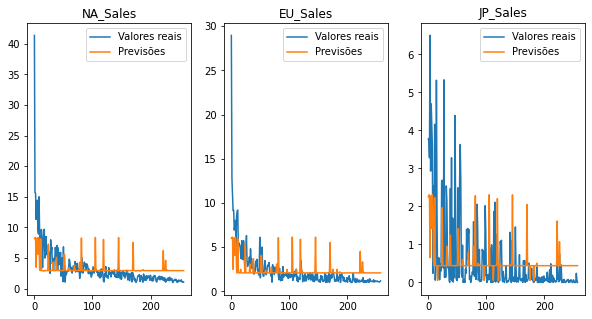

In [47]:
fig, ax = plt.subplots(1, 3, figsize=(10,5))
for i in range(3):
  ax[i].plot(vendas[:, i])
  ax[i].plot(previsoes[:, i])
  ax[i].legend(['Valores reais', 'Previsões'])
  ax[i].set_title(base.columns[4 + i])